# World of Warcraft Protection Paladin Analysis #

## Introduction ##

World of Warcraft (WoW) is a massively multiplayer online role-playing game (MMORPG) created and released by Blizzard Entertainment in 2004. In WoW, players create character avatars which allow players to explore and partake in the game's various activities. WoW boasts three primary combat-related end-game acitivities: raiding, Mythic Plus (M+), and Player vs Player (PvP). 

When creating a character, players must assign their character a "class" of which there are thirteen in total. A character's class determines the abilties/spells said character will be capable of using. Within each class, specializations exists which allow each class to further enhance their capabilties towards performing a particualr role. Each class typically has three available specializations. Currently, a specialization allows a class to perform one of three roles:

1. Tank - Uses abilties to draw the attacks of enemies

2. DPS - Uses abilties to deal heavy damage to enemies

3. Healer - Uses abilties to provide healing for and/or prevent damage to friendly players

The class at the center of this analysis is "Paladin." Paladins are holy knights that use the power of The Light to attack enemies or heal allies. The specializtion in question is "Protection" which allows the Paladin to perform as a tank.

While World of Warcraft released in 2004, the game has seen many updates since then. Roughly every two years WoW receives a new "expansion" that adds additional vertical content to the game. These expansions provide opportunities for the developers to change various aspects of the game, such as class and specialization design.

WoW's current expansion "Dragonflight" released in 2022 and brought many changes to class and specialzation design with it. For Protection Paladin in particular, a decision was made to remove Holy Power generation from the specialization's arguably most iconic ability "Avenger's Shield." Avenger's Shield causes the Paladin to throw a shield of Holy Light at an enemy; the shield can ricochet and hit up to two additional enemies by default and 4 additional enemies when ehanced by talents (Avenger's Shield functions very similar to how Captain America's shield functions). 

When this change was announced, the response from the playerbase was generally negative as Avenger's Shield is quite a fun and impactful ability to press in AoE scenarios. In response to this feedback, Blizzard stated:

    This is part of an effort to constrain Shield of the Righteous uptime, and transfer some of protection paladins’ defensive power out of Shield of the Righteous and into other cooldowns and forms of mitigation.
   
The goal of this analysis is to determine wether the stated goal of removing Holy Power generation from Avenger's Shield, a reduction in Shield of the Righteous uptime, has come to fruition. My hypothesis is Shield of the Righteous uptime has actually increased in Dragonflight relative to Shadowlands.

I have chosen to investigate this matter as I believe that Protection Paladin was a very fun specialzition to play in Shadowlands and the sole change to Avenger's Shield Holy Power generation has made the specialization much less fun to play in Mythic Plus content. This is due to the fact that Judgment and Hammer of Wrath, single target Holy Power generating abilities, now have higher priority than Avenger's Shield, the specialization's most iconic AoE ability, in Aoe scenarios.

## Data Selection and Collection ##

The data for this analysis was collected from "Warcraft Logs" a wesbite that WoW players can use to log combat data from M+ and raiding. In order for all of the combat data from a raid boss kill or M+ run to appear on the website at least one player in the group must log the activity; if no player in the group logs the activity, the raid boss kill or M+ run will still appear on the website but the detailed combat data for the activity will not be available.

The data in this analysis was manually collected from the top 100 logged M+ runs from Shadowlands season 2 and Dragonflight season 1 for Halls of Atonement and Algathar Academy dungeons respectively. These dungeons were chosen as the basis for comparison as they have the same completion time (32 minutes), large and consistent mobs pulls, and similar amounts of downtime/travel-time. Shadowlands season 2 and Dragonflight season 1 were chosen for multiple reasons:

1. Tier sets - Tier set bonuses are additional effects that a character will recieve if they have 2/5 and 4/5 pieces of their class armor set equipped. Tier sets for end-game character were not available in season 2 of Shadowlands; tier sets for end-game characters were available in Dragonflight season 1, though the efficacy of their effects were much less than previous tiers. Tier sets for end-game characters were reintroduced in season 3 of Shadowlands; the 4-piece effect for Protection Paladins was: "When you take damage, you have a chance equal to 100% of your Block chance to cast Judgment at your attacker." These Judgements generated Holy Power, so Protection Paladins in seasons 3 and 4 of Shadowlands would have artificially high Shield of the Righteous uptime when compared to the specialization at a baseline level.


2. Finality of data - Season 2 of Shadowlands and season 1 of Dragonflight have concluded at the time of this analysis. Season 2 of shadowlands ended in Febuary of 2022 and season 1 of dragonflight ended in May of 2023. This means that the top 100 runs for these seasons are "locked in" such that they will always be the top 100 run for each season. WoW is currently in season 2 of Dragonflight; if data on the top 100 runs in Dragonflight season 2 was collected today, it is not necessarily (and unlikely) the case that the top 100 runs would be the exact same a week later.

Using the top 100 runs for each season opens the analysis up to selection bias as players completing the top 100 runs are arguably among the best players in the world and hence will play differently than players of lesser skill; this likely is not a problem in this particualr scenario due to the fact that there are typically "correct" ways to play specializations. The players in the top 100 runs are the most likely to play their specializations correctly and perform on the specializations as designed by Blizzard. The "correct" way to play Protection Paladin from a defensive standpoint is to always have the armor buff from Shield of the Righteous up; not doing so results in the Paladin taking greatly increased damage.

In [1]:
# Load packages
import sys
import os

import numpy as np
import scipy as sp
from scipy import stats 
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import statsmodels.api as sm

import webbrowser

import time

# check software versions
print('### Python version: ' + sys.version)
print('### Numpy version: ' + np.__version__)
print('### Scipy version: ' + sp.__version__)
print('### Pandas version: ' + pd.__version__)
print('### Matplotlib version: ' + matplotlib.__version__)

print('------------')

### Python version: 3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
### Numpy version: 1.23.5
### Scipy version: 1.9.1
### Pandas version: 1.4.4
### Matplotlib version: 3.5.2
------------


In [2]:
# Import Excel tables

# Shadowlands season 2 data
df1 = pd.read_excel('SL_paladin_M_data.xlsx')

# Dragonflight season 1 data
df2 = pd.read_excel('DF_Paladin_M_data.xlsx')

In [3]:
df1.head()

,SR_uptime_SL,SR_casts_SL,JDG_casts_SL,HOR_casts_SL,HOW_casts_SL,AS_casts_SL,SR_cpm_SL,JDG_cpm_SL,HOR_cpm_SL,HOW_cpm_SL,AS_cpm_SL,Total_casts_SL,Active_SL,Combat_uptime_SL
0,86.70,437,276,307,138,178,13.9,8.8,9.8,4.4,5.7,1935,94.96,91.301601
1,86.56,376,271,231,141,150,12.8,9.2,7.9,4.8,5.1,1696,93.18,92.895471
2,84.91,404,281,292,142,155,13.6,9.4,9.8,4.8,5.2,1812,94.38,89.966095
3,83.32,374,255,255,123,162,12.5,8.5,8.5,4.1,5.4,1712,95.23,87.493437
4,82.70,407,276,285,133,175,13.6,9.2,9.5,4.5,5.9,1819,93.50,88.449198


In [4]:
df2.head()

,SR_uptime_DF1,SR_casts_DF1,JDG_casts_DF1,HOR_casts_DF1,HOW_casts_DF1,AS_casts_DF1,SR_cpm_DF1,JDG_cpm_DF1,HOR_cpm_DF1,HOW_cpm_DF1,AS_cpm_DF1,Total_casts_DF1,Active_DF1,Combat_uptime_DF1
0,88.02,410,514,473,102,143.0,13.1,16.5,15.2,3.3,4.6,2121,92.37,95.290679
1,91.74,451,529,385,110,200.0,14.4,16.9,12.3,3.5,6.4,2276,95.66,95.902153
2,88.59,423,458,417,162,191.0,13.4,14.5,13.2,5.1,6.0,2246,93.82,94.425496
3,92.20,499,590,457,149,180.0,15.9,18.7,14.5,4.7,5.7,2457,94.42,97.648803
4,86.02,412,503,413,138,181.0,13.0,15.9,13.0,4.4,5.7,2121,92.84,92.654028


In [5]:
# Check data frames

# Shadowlands season 2
df1.info()

# Dragonflight season 1
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SR_uptime_SL      100 non-null    float64
 1   SR_casts_SL       100 non-null    int64  
 2   JDG_casts_SL      100 non-null    int64  
 3   HOR_casts_SL      100 non-null    int64  
 4   HOW_casts_SL      100 non-null    int64  
 5   AS_casts_SL       100 non-null    int64  
 6   SR_cpm_SL         100 non-null    float64
 7   JDG_cpm_SL        100 non-null    float64
 8   HOR_cpm_SL        100 non-null    float64
 9   HOW_cpm_SL        100 non-null    float64
 10  AS_cpm_SL         100 non-null    float64
 11  Total_casts_SL    100 non-null    int64  
 12  Active_SL         100 non-null    float64
 13  Combat_uptime_SL  100 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 11.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14

In [6]:
# Active % comparison

# Shadowlands
Active_SL = df1['Active_SL'].mean()
print("Combat time in Shadowlands: " + str(Active_SL))

# Dragonflight
Active_DF = df2['Active_DF1'].mean()
print("Combat time in Dragonflight: " + str(Active_DF))

# Provides evidence that Algathar Academy and Halls of Atonement have similar amounts of downtime

Combat time in Shadowlands: 92.90459999999997
Combat time in Dragonflight: 92.62659999999998


<function matplotlib.pyplot.show(close=None, block=None)>

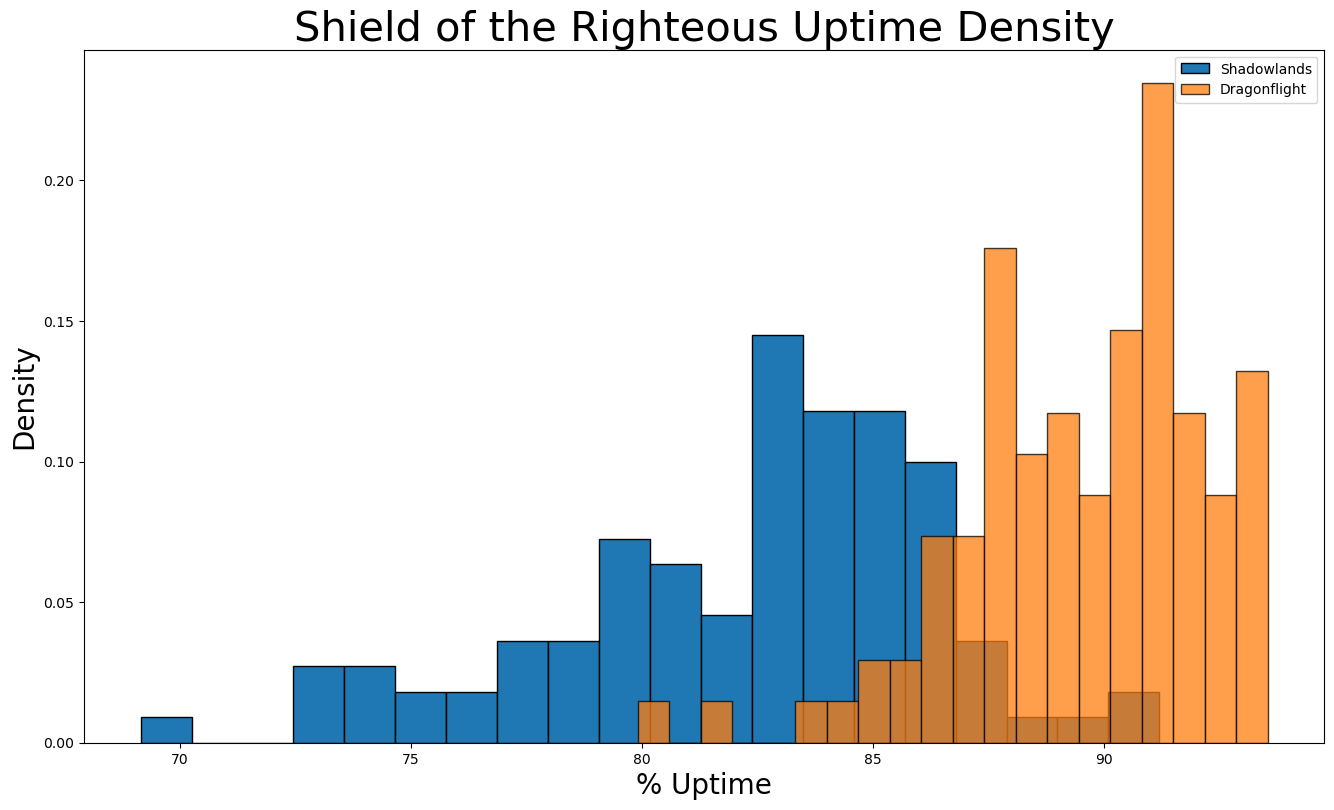

In [7]:
# Histogram
fig = plt.figure(figsize= (16, 9))
ax = fig.add_subplot(111)
plt.xlabel('% Uptime', fontsize = 20)
plt.ylabel('Density', fontsize = 20)
plt.title('Shield of the Righteous Uptime Density', fontsize = 30)

plt.hist(df1['SR_uptime_SL'], label= "SL",
                     density= True,
                     alpha=1, edgecolor='black', bins=20)

plt.hist(df2['SR_uptime_DF1'], label= "DF",
                       density= True,
                       alpha=0.75, edgecolor='black', bins=20)

plt.legend(['Shadowlands', 'Dragonflight'])

plt.show

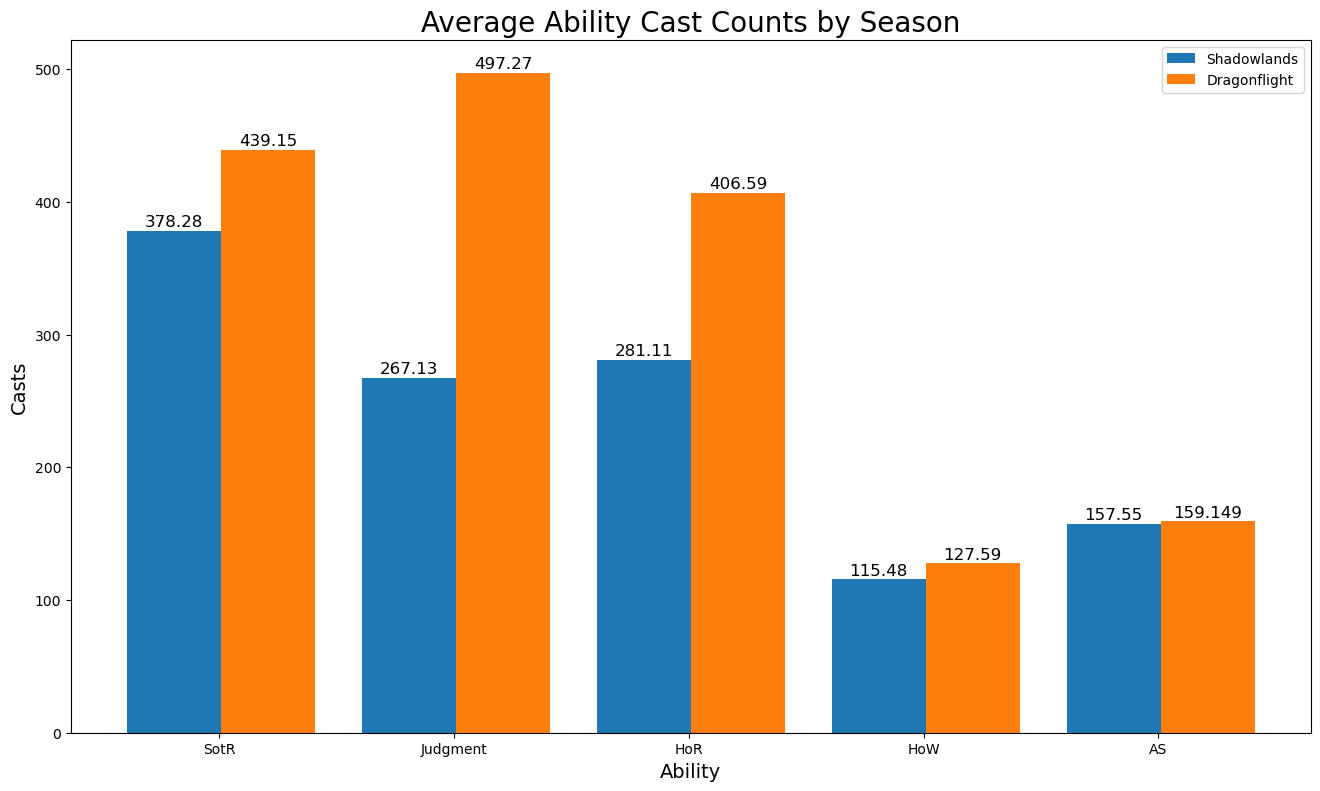

In [8]:
# Bar graph of mean ability usage
plt.figure(figsize= (16, 9))

w = 0.4
x = ['SotR', 'Judgment', 'HoR', 'HoW', 'AS']
SL = [df1['SR_casts_SL'].mean(), df1['JDG_casts_SL'].mean(), df1['HOR_casts_SL'].mean(), df1['HOW_casts_SL'].mean(), df1['AS_casts_SL'].mean()]
DF = [df2['SR_casts_DF1'].mean(), df2['JDG_casts_DF1'].mean(), df2['HOR_casts_DF1'].mean(), df2['HOW_casts_DF1'].mean(), df2['AS_casts_DF1'].mean()]

#
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plot1 = plt.bar(bar1, SL, w, label = 'Shadowlands')
plot2 = plt.bar(bar2, DF, w, label = 'Dragonflight')

plt.bar_label(plot1, labels = SL, label_type = 'edge', padding = 1, fontsize = 12)
plt.bar_label(plot2, labels = DF, label_type = 'edge', padding = 1, fontsize = 12)

fig.tight_layout()

plt.xlabel('Ability', fontsize = 14)
plt.ylabel('Casts', fontsize = 14)
plt.xticks(bar1 + w/2.1, x)
plt.legend()
plt.title('Average Ability Cast Counts by Season', fontsize = 20)
plt.show()

In [9]:
# Judgement to Avenger's Shield ratio calculations

# Shadowlands
JDG_AS_SL = (df1['JDG_casts_SL'].mean() / df1['AS_casts_SL'].mean())
print("Judgement to Avenger's Shield ratio in Shadowlands: " + str(JDG_AS_SL))

# Dragonflight
JDG_AS_DF = (df2['JDG_casts_DF1'].mean() / df2['AS_casts_DF1'].mean())
print("Judgement to Avenger's Shield ratio in Dragonflight: " + str(JDG_AS_DF))

Judgement to Avenger's Shield ratio in Shadowlands: 1.695525230085687
Judgement to Avenger's Shield ratio in Dragonflight: 3.124556233466751


In [10]:
# Ability casts as percentage of total casts

# Shadowlands
SotR = (df1['SR_casts_SL'].mean() / df1['Total_casts_SL'].mean())*100
JDG = (df1['JDG_casts_SL'].mean() / df1['Total_casts_SL'].mean())*100
HoR = (df1['HOR_casts_SL'].mean() / df1['Total_casts_SL'].mean())*100
HoW = (df1['HOW_casts_SL'].mean() / df1['Total_casts_SL'].mean())*100
AS = (df1['AS_casts_SL'].mean() / df1['Total_casts_SL'].mean())*100

print("Shield of the Righteous as percentage of total casts in Shadowlands: " + str(SotR))
print("Judgement as percentage of total casts in Shadowlands: " + str(JDG))
print("Hammer of the Righteous as percentage of total casts in Shadowlands: " + str(HoR))
print("Hammer of Wrath as percentage of total casts in Shadowlands: " + str(HoW))
print("Avenger's Shield as percentage of total casts in Shadowlands: " + str(AS))
print('------------')

# Dragonflight
SotR = (df2['SR_casts_DF1'].mean() / df2['Total_casts_DF1'].mean())*100
JDG = (df2['JDG_casts_DF1'].mean() / df2['Total_casts_DF1'].mean())*100
HoR = (df2['HOR_casts_DF1'].mean() / df2['Total_casts_DF1'].mean())*100
HoW = (df2['HOW_casts_DF1'].mean() / df2['Total_casts_DF1'].mean())*100
AS = (df2['AS_casts_DF1'].mean() / df2['Total_casts_DF1'].mean())*100

print("Shield of the Righteous as percentage of total casts in Dragonflight: " + str(SotR))
print("Judgement to as percentage of total casts in Dragonflight: " + str(JDG))
print("Hammer of the Righteous as percentage of total casts in Dragonflight: " + str(HoR))
print("Hammer of Wrath as percentage of total casts in Dragonflight: " + str(HoW))
print("Avenger's Shield as percentage of total casts in Dragonflight: " + str(AS))

Shield of the Righteous as percentage of total casts in Shadowlands: 22.204612558038516
Judgement as percentage of total casts in Shadowlands: 15.680231977976181
Hammer of the Righteous as percentage of total casts in Shadowlands: 16.500842328936788
Hammer of Wrath as percentage of total casts in Shadowlands: 6.778546733113801
Avenger's Shield as percentage of total casts in Shadowlands: 9.248008640475227
------------
Shield of the Righteous as percentage of total casts in Dragonflight: 20.718434051547217
Judgement to as percentage of total casts in Dragonflight: 23.46044791258769
Hammer of the Righteous as percentage of total casts in Dragonflight: 19.18230240468765
Hammer of Wrath as percentage of total casts in Dragonflight: 6.019503587924194
Avenger's Shield as percentage of total casts in Dragonflight: 7.508409565910709


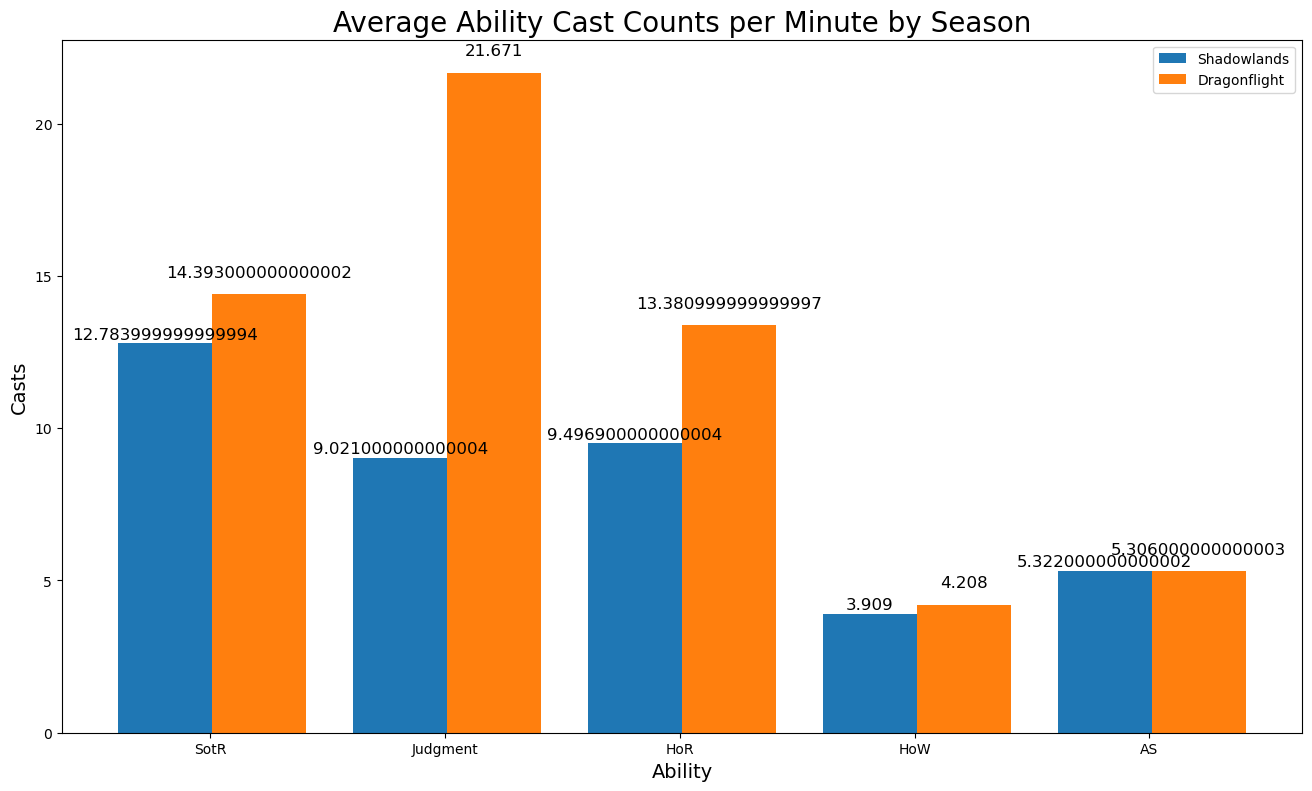

In [11]:
# Bar graph of mean ability usage per minute
plt.figure(figsize= (16, 9))

w = 0.4
x = ['SotR', 'Judgment', 'HoR', 'HoW', 'AS']
SL = [df1['SR_cpm_SL'].mean(), df1['JDG_cpm_SL'].mean(), df1['HOR_cpm_SL'].mean(), df1['HOW_cpm_SL'].mean(), df1['AS_cpm_SL'].mean()]
DF = [df2['SR_cpm_DF1'].mean(), df2['JDG_cpm_DF1'].mean(), df2['HOR_cpm_DF1'].mean(), df2['HOW_cpm_DF1'].mean(), df2['AS_cpm_DF1'].mean()]

#
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]

plot1 = plt.bar(bar1, SL, w, label = 'Shadowlands')
plot2 = plt.bar(bar2, DF, w, label = 'Dragonflight')

plt.bar_label(plot1, labels = SL, label_type = 'edge', padding = 1, fontsize = 12)
plt.bar_label(plot2, labels = DF, label_type = 'edge', padding = 10, fontsize = 12)

fig.tight_layout()

plt.xlabel('Ability', fontsize = 14)
plt.ylabel('Casts', fontsize = 14)
plt.xticks(bar1 + w/2.1, x)
plt.legend()
plt.title('Average Ability Cast Counts per Minute by Season', fontsize = 20)
plt.show()

## T-test ##

In [12]:
# Convert to numpy
x = df1['SR_uptime_SL'].to_numpy()
y = df2['SR_uptime_DF1'].to_numpy()

In [13]:
# Check for normal distribution
sampling_difference = x - y

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.9891339540481567, pvalue=0.5951364040374756)

In [14]:
# Check for homogeneity of variance
stats.levene(x, y, center= 'mean')

LeveneResult(statistic=14.74283774455753, pvalue=0.00016576253524296162)

In [15]:
# Conduct Welch's t-test
t_stat, p_val = stats.ttest_ind(x, y, equal_var = False)
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = -14.707825216182473
p-value = 5.674696203852807e-32


In [16]:
# Calcualte percent change from SL to DF
change = ((df2['SR_uptime_DF1'].mean() - df1['SR_uptime_SL'].mean()) / (df1['SR_uptime_SL'].mean())) * 100
change

print("Shield of the Righteous uptime is " + str(change) + "% greater in Dragonflight than Shadowlands")

Shield of the Righteous uptime is 8.771292582127186% greater in Dragonflight than Shadowlands


A p-value of 5.674696203852807e-32 indicates that the means for the two groups are statistcailly singificantly different from one another. The results of the test provide evidence that the removal of Holy Power generation from Avenger's Shield has not lead to a reduction in Shield of the Righteous uptime. In fact, Shield of the Righteous uptime has increased by 8.77% after the removal of Holy Power generation from Avenger's Shield.

It is important to note that the results of this test do not indicate that the removal of Holy Power from Avenger's Shield have directly caused Shield of the Righteous uptime to increase; Shield of the Righteous uptime being greater in Dragonflight than Shadowlands is likely due to a multitude of factors which will be discussed below.

## T-test (adjusted for combat uptime) ##

In [17]:
# Convert to numpy
x = df1['Combat_uptime_SL'].to_numpy()
y = df2['Combat_uptime_DF1'].to_numpy()

In [18]:
# Check for normal distribution
sampling_difference = x - y

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.9796578884124756, pvalue=0.1250201016664505)

In [19]:
# Check for homogeneity of variance
stats.levene(x, y, center= 'mean')

LeveneResult(statistic=16.085232704547064, pvalue=8.577815755244131e-05)

In [20]:
# Conduct Welch's t-test
t_stat, p_val = stats.ttest_ind(x, y, equal_var = False)
print("t-statistic = " + str(t_stat))  
print("p-value = " + str(p_val))

t-statistic = -17.092923809662334
p-value = 6.585634039211976e-39


In [21]:
# Calcualte percent change from SL to DF
change = ((df2['Combat_uptime_DF1'].mean() - df1['Combat_uptime_SL'].mean()) / (df1['Combat_uptime_SL'].mean())) * 100
change

print("Shield of the Righteous uptime is " + str(change) + "% greater in Dragonflight than Shadowlands when adjusted for combat uptime")

Shield of the Righteous uptime is 9.111003081572154% greater in Dragonflight than Shadowlands when adjusted for combat uptime


A p-value of 6.585634039211976e-39 indicates that the means for the two groups are statistcailly singificantly different from one another. The results of the test provide evidence that the removal of Holy Power generation from Avenger's Shield has not lead to a reduction in Shield of the Righteous uptime. In fact, Shield of the Righteous uptime has increased by 9.11% after the removal of Holy Power generation from Avenger's Shield.

In [22]:
# SotR casts Regression SL season 2

res = sm.OLS(df1['SR_casts_SL'],(df1[['JDG_casts_SL', 'HOR_casts_SL', 'HOW_casts_SL', 'AS_casts_SL']])).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:            SR_casts_SL   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          1.084e+04
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                   1.62e-126
Time:                        12:07:13   Log-Likelihood:                         -430.07
No. Observations:                 100   AIC:                                      868.1
Df Residuals:                      96   BIC:                                      878.6
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------

In [23]:
# SotR casts Regression DF season 1

res = sm.OLS(df2['SR_casts_DF1'],(df2[['JDG_casts_DF1', 'HOR_casts_DF1', 'HOW_casts_DF1', 'AS_casts_DF1']])).fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:           SR_casts_DF1   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.993
Method:                 Least Squares   F-statistic:                              3674.
Date:                Thu, 03 Aug 2023   Prob (F-statistic):                   4.76e-104
Time:                        12:07:13   Log-Likelihood:                         -499.08
No. Observations:                 100   AIC:                                      1006.
Df Residuals:                      96   BIC:                                      1017.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------